In [1]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
from scipy.stats import pearsonr, spearmanr
import h3pandas
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pickle
from warnings import filterwarnings
import matplotlib.colors as colors
import geopandas as gpd 
import sys
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import matplotlib

from plotting_utils import get_color_dict
color_dict = get_color_dict()

filterwarnings('ignore')
tqdm.pandas()

plt.rcParams.update({'font.family':'arial'})



In [2]:
all_data = pd.read_csv('../../data/D07.BYM2_summary/beta_geographic_summary.csv')

In [3]:
all_data[all_data['env_var']=='tmin'].groupby('niche')[['beta_mean']].mean().sort_values(by='beta_mean')


,beta_mean
niche,
Trophic_Niche_Aquatic_predator,0.640519
Trophic_Level_Carnivore,0.641952
Trophic_Niche_Invertivore,0.698108
Trophic_Niche_Herbivore_aquatic,0.741454
Trophic_Niche_Herbivore_terrestrial,0.757735
Trophic_Niche_Scavenger,0.768494
Trophic_Niche_Vertivore,0.793341
Trophic_Level_Scavenger,0.804152
Trophic_Level_Herbivore,0.804895


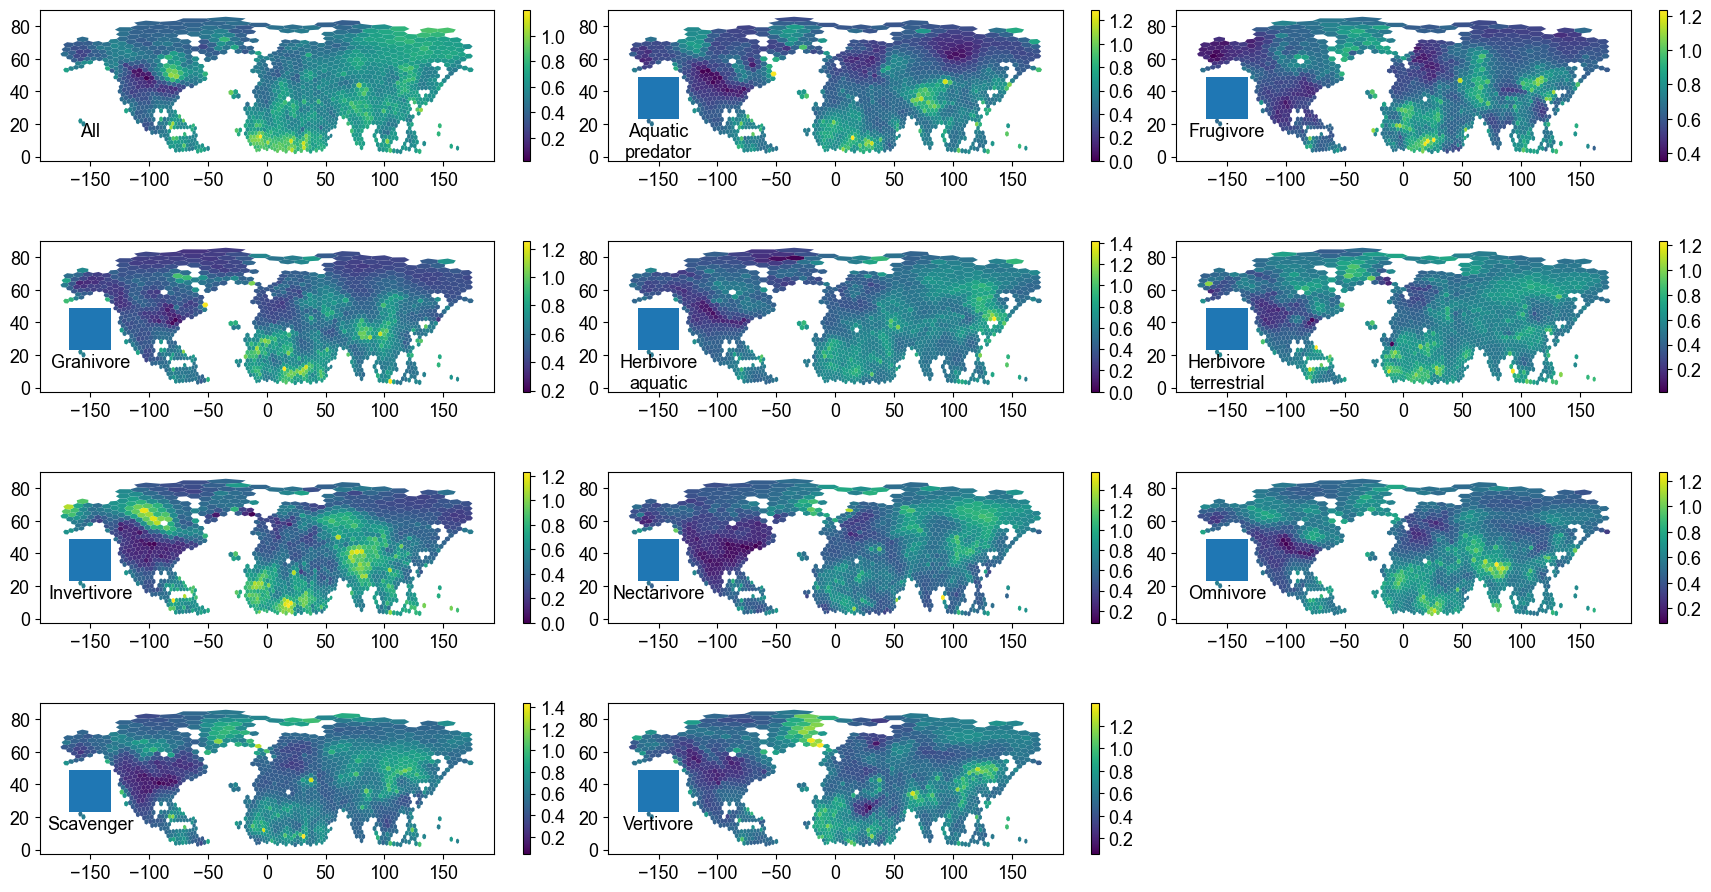

In [11]:
fig,axs = plt.subplots(4,3,figsize=((11/2) * 4, (8/2)*3))
for niche_count, niche in enumerate(color_dict.keys()):
    
    ax = axs[niche_count // 3, niche_count % 3]
    
    data = all_data[(all_data['niche']==niche) & (all_data['env_var']=='delta_NDVI')]
    data = data.groupby(['h3_02','lng','lat'])[['beta_mean']].mean().reset_index(drop=False)\
            .set_index('h3_02').h3.h3_to_geo_boundary().reset_index(drop=False)
    data.plot('beta_mean', ax = ax,legend=False,cmap='viridis')
    
    vmin, vmax = data['beta_mean'].min(), data['beta_mean'].max()

    norm = matplotlib.colors.Normalize(vmin=max(vmin, 0), vmax=vmax)

    cbar = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
    cb = plt.colorbar(cbar, ax=ax, shrink=0.65)
    # cb.set_label(label="Sensitivity to temperature", fontsize=15)

    cb.set_ticks([i for i in np.arange(0,2,0.2) if not (i > vmax or i < vmin)])
    cb.set_ticklabels(["{:.1f}".format(float(i)) for i in cb.get_ticks()], fontsize=13)

    # add annotation
    import skunk
    from matplotlib.offsetbox import AnnotationBbox
    size=(30,30)
    
    if not niche == 'all':
        box = skunk.Box(size[0], size[1], niche)
        ab = AnnotationBbox(box, (-150,36),
                    xycoords='data',
                    boxcoords='data',
                    frameon=False)
        ax.add_artist(ab)
        
    ax.annotate(niche.split('Trophic_Niche_')[-1].replace('_',' ').capitalize().replace(' ','\n'),
            xy=(-150,21),  # Position to place the annotation text
            fontsize=13,
            ha='center',va='top')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
# plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
axs[3, 2].remove()

svg = skunk.insert({niche:f"../../silhouette/SVG/{niche}.svg" for niche in color_dict.keys() if not niche == 'all'})

import cairosvg
cairosvg.svg2pdf(bytestring=svg, write_to='Sensitivity_to_green-up.pdf')

# plt.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0) #left=0.1, right=0.9, top=0.9, bottom=0.1, 


## Sensitivity for invertivores at eastern North America

In [17]:
tmp = all_data[(all_data['niche']=='Trophic_Niche_Invertivore') & (all_data['env_var']=='delta_NDVI')]
tmp = tmp[(tmp['lat']>=28.89) & (tmp['lat']<=53.33) & (tmp['lng']>=-100.52) & (tmp['lng']<=-68.42)]
tmp['beta_mean'].mean()


0.20620031929005167

,h3_02,lng,lat,dist,cell_index,year_data_count,beta_mean,beta_std,niche,env_var,season
46732,820e47fffffffff,-70.450450,51.801802,1,320,11.0,0.548797,0.168771,Trophic_Niche_Invertivore,delta_NDVI,spring
46733,820e4ffffffffff,-69.729730,48.918919,1,321,11.0,0.427580,0.175376,Trophic_Niche_Invertivore,delta_NDVI,spring
46734,820e57fffffffff,-75.495495,52.882883,1,322,11.0,0.560973,0.169105,Trophic_Niche_Invertivore,delta_NDVI,spring
46735,820e5ffffffffff,-74.054054,49.819820,1,323,10.0,0.484567,0.159428,Trophic_Niche_Invertivore,delta_NDVI,spring
46745,820ec7fffffffff,-83.783784,51.261261,1,334,10.0,0.684830,0.152890,Trophic_Niche_Invertivore,delta_NDVI,spring
...,...,...,...,...,...,...,...,...,...,...,...
47579,8244d7fffffffff,-80.180180,31.081081,1,1606,11.0,0.330703,0.224229,Trophic_Niche_Invertivore,delta_NDVI,spring
47580,8244dffffffffff,-81.621622,33.603604,1,1607,11.0,0.208027,0.187720,Trophic_Niche_Invertivore,delta_NDVI,spring
47581,8244e7fffffffff,-84.864865,28.918919,1,1608,11.0,0.349771,0.201795,Trophic_Niche_Invertivore,delta_NDVI,spring
47582,8244effffffffff,-86.666667,31.621622,1,1609,11.0,0.263486,0.197581,Trophic_Niche_Invertivore,delta_NDVI,spring


In [10]:
tmp


,h3_02,lng,lat,dist,cell_index,year_data_count,beta_mean,beta_std,niche,env_var,season
46496,820007fffffffff,36.216216,77.747748,1,0,3.0,0.255511,0.240780,Trophic_Niche_Invertivore,delta_NDVI,spring
46497,82001ffffffffff,46.666667,79.549550,1,3,5.0,0.329037,0.180193,Trophic_Niche_Invertivore,delta_NDVI,spring
46498,820027fffffffff,28.648649,75.765766,1,4,3.0,0.668377,0.125980,Trophic_Niche_Invertivore,delta_NDVI,spring
46499,82002ffffffffff,22.882883,78.108108,1,5,6.0,0.422569,0.235461,Trophic_Niche_Invertivore,delta_NDVI,spring
46500,82004ffffffffff,-37.297297,82.972973,1,8,5.0,0.363694,0.235752,Trophic_Niche_Invertivore,delta_NDVI,spring
...,...,...,...,...,...,...,...,...,...,...,...
47997,827af7fffffffff,43.783784,4.054054,1,2651,10.0,0.632450,0.209174,Trophic_Niche_Invertivore,delta_NDVI,spring
47998,828297fffffffff,15.675676,1.891892,1,2674,6.0,0.914648,0.176071,Trophic_Niche_Invertivore,delta_NDVI,spring
47999,82829ffffffffff,13.153153,2.972973,1,2675,6.0,0.994496,0.190465,Trophic_Niche_Invertivore,delta_NDVI,spring
48000,8282d7fffffffff,8.468468,2.252252,1,2677,6.0,0.751871,0.259159,Trophic_Niche_Invertivore,delta_NDVI,spring


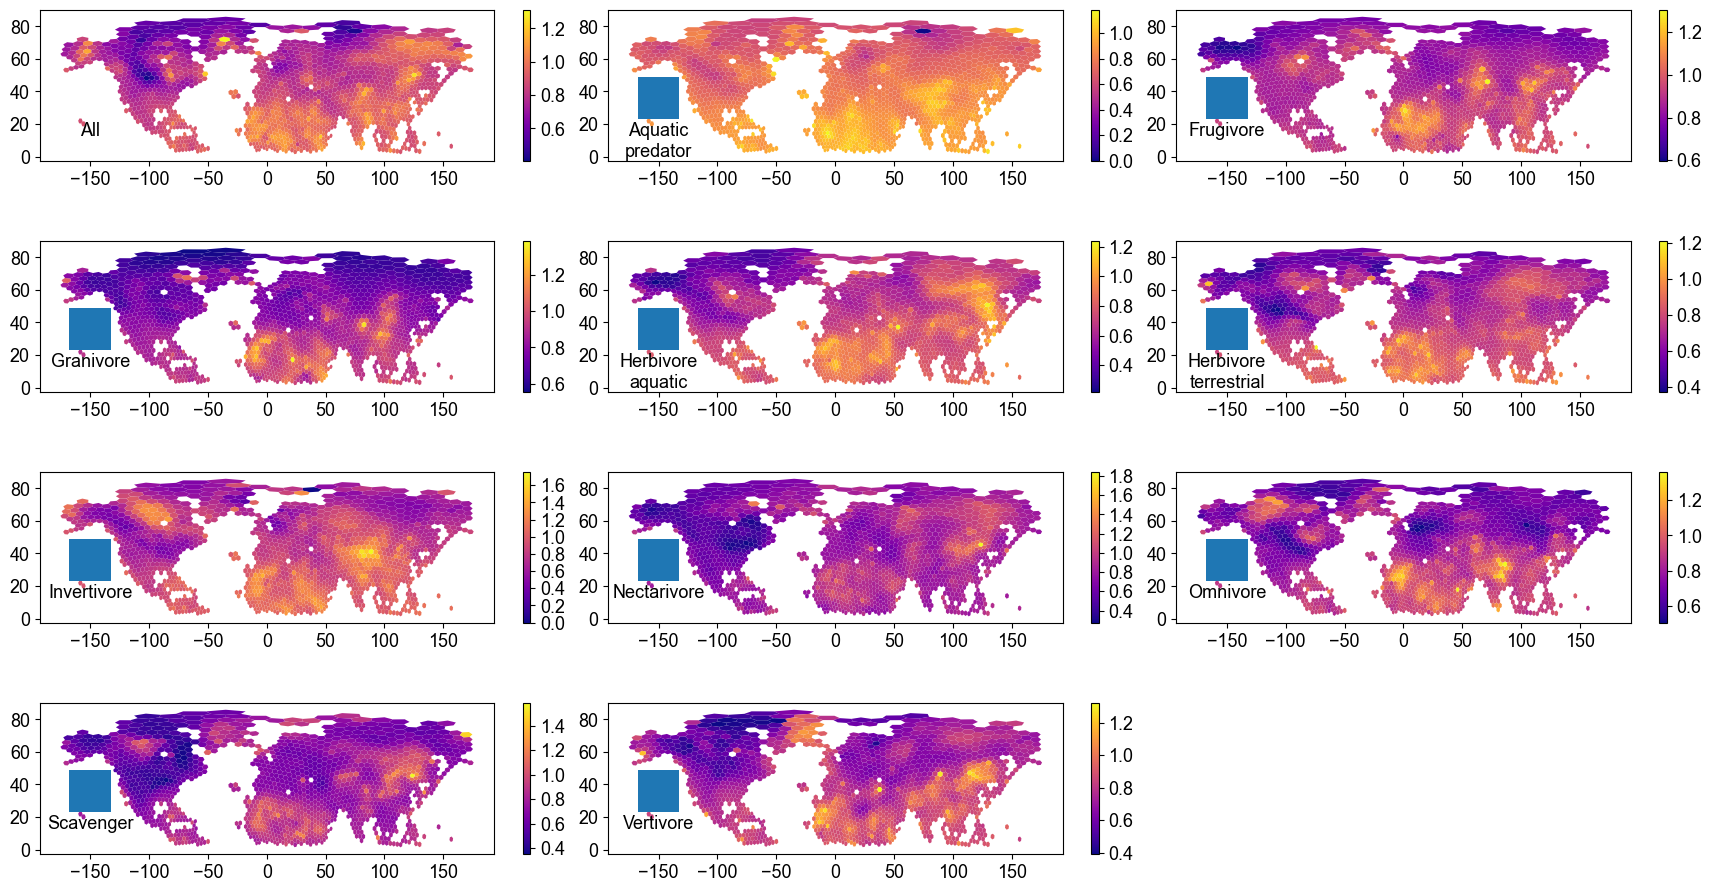

In [14]:
fig,axs = plt.subplots(4,3,figsize=((11/2) * 4, (8/2)*3))
for niche_count, niche in enumerate(color_dict.keys()):
    
    ax = axs[niche_count // 3, niche_count % 3]
    
    data = all_data[(all_data['niche']==niche) & (all_data['env_var']=='tmin')]
    data = data.groupby(['h3_02','lng','lat'])[['beta_mean']].mean().reset_index(drop=False)\
            .set_index('h3_02').h3.h3_to_geo_boundary().reset_index(drop=False)
    data.plot('beta_mean', ax = ax,legend=False,cmap='plasma')
    
    vmin, vmax = data['beta_mean'].min(), data['beta_mean'].max()

    norm = matplotlib.colors.Normalize(vmin=max(vmin, 0), vmax=vmax)

    cbar = plt.cm.ScalarMappable(norm=norm, cmap='plasma')
    cb = plt.colorbar(cbar, ax=ax, shrink=0.65)
    # cb.set_label(label="Sensitivity to temperature", fontsize=15)

    cb.set_ticks([i for i in np.arange(0,2,0.2) if not (i > vmax or i < vmin)])
    cb.set_ticklabels(["{:.1f}".format(float(i)) for i in cb.get_ticks()], fontsize=13)

    # add annotation
    import skunk
    from matplotlib.offsetbox import AnnotationBbox
    size=(30,30)
    
    if not niche == 'all':
        box = skunk.Box(size[0], size[1], niche)
        ab = AnnotationBbox(box, (-150,36),
                    xycoords='data',
                    boxcoords='data',
                    frameon=False)
        ax.add_artist(ab)
        
    ax.annotate(niche.split('Trophic_Niche_')[-1].replace('_',' ').capitalize().replace(' ','\n'),
            xy=(-150,21),  # Position to place the annotation text
            fontsize=13,
            ha='center',va='top')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=13)
    
# plt.tight_layout()
fig.subplots_adjust(wspace=0, hspace=0)
axs[3, 2].remove()

svg = skunk.insert({niche:f"../../silhouette/SVG/{niche}.svg" for niche in color_dict.keys() if not niche == 'all'})

import cairosvg
cairosvg.svg2pdf(bytestring=svg, write_to='Sensitivity_to_temperature.pdf')

# plt.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0) #left=0.1, right=0.9, top=0.9, bottom=0.1, 
